# Tensorflow with 3 convnet layers, with dropout
### 3 classese

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

import nibabel as nib
from sklearn.model_selection import train_test_split

import time
from datetime import timedelta
import math

## Loading data to get 2 classes
Shoe and house

In [2]:
data_s1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/bold.nii')
data_s2 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj2/bold.nii')
data_s3 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj3/bold.nii')
data_s4 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj4/bold.nii')
data_s5 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj5/bold.nii')
data_s6 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj6/bold.nii')

label_s1 = np.recfromcsv('/home/farahana/Documents/dataset/Haxby2001/subj1/labels.txt', delimiter=' ')

session = label_s1['chunks']
y = label_s1['labels']

print("Subjects data shape are", data_s1.shape, data_s2.shape, data_s3.shape, data_s4.shape, data_s5.shape, data_s6.shape)

Subjects data shape are (40, 64, 64, 1452) (40, 64, 64, 1452) (40, 64, 64, 1452) (40, 64, 64, 1452) (40, 64, 64, 1452) (40, 64, 64, 1452)


In [3]:
# Getting both subject using get_data()
idx = data_s1.shape[0] # take the shape:40 as idx
data_1 = data_s1.get_data()
data_2 = data_s2.get_data()
data_3 = data_s3.get_data()
data_4 = data_s4.get_data()
data_5 = data_s5.get_data()
data_6 = data_s6.get_data()

In [4]:
# Initialize the 'rest' and 'house' labels
shoe_state = y == b'shoe'
house_state = y == b'house'

# Divide the rest and house state for labels and data
y_shoe = session[shoe_state]
y_house = session[house_state]

In [5]:
y_shoe_one = np.zeros(y_shoe.shape[0], dtype = object)
y_shoe_one[:] = 0

y_house_one = np.zeros(y_house.shape[0], dtype = object)
y_house_one[:] = 1

In [6]:
# Combining the data_1, data_2 and data_3 for both labels
data_1_reshape = np.reshape(data_1[20,:,:,[y_shoe,y_house]],(64*64,-1)).T
data_2_reshape = np.reshape(data_2[20,:,:,[y_shoe,y_house]],(64*64,-1)).T
data_3_reshape = np.reshape(data_3[20,:,:,[y_shoe,y_house]],(64*64,-1)).T
data_4_reshape = np.reshape(data_4[20,:,:,[y_shoe,y_house]],(64*64,-1)).T
data_5_reshape = np.reshape(data_5[20,:,:,[y_shoe,y_house]],(64*64,-1)).T
data_6_reshape = np.reshape(data_6[20,:,:,[y_shoe,y_house]],(64*64,-1)).T

print("the datas' shape are: ", data_1_reshape.shape, data_2_reshape.shape, data_3_reshape.shape, 
      data_4_reshape.shape, data_5_reshape.shape, data_5_reshape.shape)

data = np.concatenate((data_1_reshape[:], data_2_reshape[:]), axis = 0)
data = np.concatenate((data[:], data_3_reshape[:]), axis = 0) 
data = np.concatenate((data[:], data_4_reshape[:]), axis = 0) 
data = np.concatenate((data[:], data_5_reshape[:]), axis = 0) 
data = np.concatenate((data[:], data_6_reshape[:]), axis = 0) 

print ("The appended data shape is ", data.shape)

the datas' shape are:  (216, 4096) (216, 4096) (216, 4096) (216, 4096) (216, 4096) (216, 4096)
The appended data shape is  (1296, 4096)


In [7]:
# Data label appending and hot encode
data_session = np.concatenate((y_shoe_one[:], y_house_one[:]), axis=0)
data_session.shape

(216,)

In [8]:
data_label = np.concatenate((data_session[:], data_session[:]), axis = 0)
data_label = np.concatenate((data_label[:], data_session[:]), axis = 0)
data_label = np.concatenate((data_label[:], data_session[:]), axis = 0)
data_label = np.concatenate((data_label[:], data_session[:]), axis = 0)
data_label = np.concatenate((data_label[:], data_session[:]), axis = 0)

data_label.shape

(1296,)

In [9]:
data_session = (np.arange(2) == data_label[:, None]).astype(np.float32)
print ("data session and data label shape", data_session.shape, data_label.shape)

data session and data label shape (1296, 2) (1296,)


In [10]:
data_session[150:170]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [11]:
data_label[150:170]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=object)

### Splitting data (using sklearn)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, data_session, test_size = 0.2, random_state = 123)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, data_label, test_size = 0.2, random_state = 123)

In [13]:
print ("size of train and test set: ", X_train.shape, X_test.shape)

size of train and test set:  (1036, 4096) (260, 4096)


## Conventional Layers (with TensorFlow)

## Initialization step

In [14]:
# Variables and initialization

img_size = 64 # height/width pixel image
img_size_flat = img_size*img_size
img_shape = (img_size, img_size)
num_classes = 2

# Convolutional Layer 1
filter_size1 = 5
num_filters1 = 52

# Convolutional Layer 2
filter_size2 = 5
num_filters2 = 128

# Convolutional Layer 
filter_size3 = 5
num_filters3 = 200

# Fully-connected layer
fc_size = 400

num_channels = 1

In [15]:
def plot_images(images, cls_true, cls_pred=None):
    #assert len(images) == len(cls_true) == 11
    
    # Create figure with 3 by 3 subplots
    fig, axes = plt.subplots(4,3)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape),cmap=plt.cm.gray)
        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred:  {1}".format(cls_true[i], cls_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

## Tensorflow Graph

In [16]:
# 1. Placeholder
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

y_true = tf.placeholder(tf.float32, shape=[None, 2], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

In [17]:
# 2. Variables

# 2.1 Helper-functions for creating new variables
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
    
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape = [length]))

# 2.2 Helper-function for creating new Convolutional Layer
# Input is a 4-dimension:[image #, y-axis, x-axis, channel of each image]
# Ouput is a 4-dimension:[image #, y_axis, x-axis, channell produced by conv-layer]
# for Y-axis and x-axis of output, if 2x2 pooling is used, the h and w is divided by 2
def new_conv_layer (input,              # the previous layer
                   num_input_channels,  # num channels of previous layer
                   filter_size,         # h and w of each filter
                   num_filters,
                   use_pooling = True):  # use 2x2 max-pooling
    shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    weights = new_weights(shape=shape)
    biases = new_biases(length=num_filters)
    
    # creating TF operation for conv
    layer = tf.nn.conv2d(input=input, 
                         filter=weights, 
                         strides=[1,1,1,1], # the strides are set to 1 in all dimension; strides=[image #, 1, 1, input_channel]
                         padding='SAME')    # iput image is padded with zeros so the size of output is the same
    
    # add the biases to the result of convolution, layer = layer + biases
    layer += biases
    
    # pooling is used to donwsample
    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                              ksize=[1,2,2,1],
                              strides=[1,2,2,1],
                              padding='SAME')

    # rectified linear unit (Relu)=max(x,0) 
    # will add some non-linearity to allow complicated functions learning
    layer = tf.nn.relu(layer)
    
    # side notes:
    # normally relu is before max-pooling, but,
    # since relu(max_pool(x)) == max_pool(relu(x)), 75% of relu-operation is saved
    
    return layer, weights

# 2.3 Helper-function for layer flattening
# from 4-dimension convolutional layer ouput to 2-dimension fully-connected layer input
def flatten_layer(layer):
    layer_shape = layer.get_shape()
    
    # layer_shape = [num_images, img_w, img_h, num_channels]
    # number of features = img_w*img_h*num_channels
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features]
    # pass '[-1]' to flatten or '-1' to infer the shape
    # now, the layer_flat will be [num_images, img_h*img_w*num_channels]
    layer_flat = tf.reshape(layer, [-1, num_features])
    
    return layer_flat, num_features

# 2.4 Helper-function for creating the Fully-connected layer
# receive from the flatten-layer
def new_fc_layer(input,
                num_inputs,
                num_outputs,
                use_relu=True):
    
    # create new weights and biases
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    
    layer = tf.matmul(input, weights) + biases
    
    # if relu is true,
    if use_relu:
        layer = tf.nn.relu(layer)
        
    return layer

In [18]:
# 3. Mathematical models

# 3.1 convolutional layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image,
                                           num_input_channels=num_channels,
                                           filter_size = filter_size1,
                                           num_filters = num_filters1,
                                           use_pooling = True)

# 3.2 convolutional layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_conv1,
                                           num_input_channels=num_filters1,
                                           filter_size = filter_size2,
                                           num_filters = num_filters2,
                                           use_pooling = True)

# 3.3 convolutional layer 
layer_conv3, weights_conv3 = new_conv_layer(input=layer_conv2,
                                           num_input_channels=num_filters2,
                                           filter_size = filter_size3,
                                           num_filters = num_filters3,
                                           use_pooling = True)

# 3.2 Flatten layer
layer_flat, num_features = flatten_layer(layer_conv3)

# 3.5.1 Fully-connected layer 1
layer_fc1 = new_fc_layer(input=layer_flat,
                        num_inputs=num_features,
                        num_outputs = fc_size,
                        use_relu=True)

# 3.5.. Dropout layer
keep_prob = tf.placeholder(tf.float32)
layer_fc1_drop = tf.nn.dropout(layer_fc1, keep_prob)

# 3.5.2 Fully-connected layer 2
layer_fc2 = new_fc_layer(input=layer_fc1_drop,
                        num_inputs=fc_size,
                        num_outputs = num_classes,
                        use_relu=False)

# nomalize the outputs(sum of each row=1, each element is in range [0.1])
y_pred = tf.nn.softmax(layer_fc2)

y_pred_cls = tf.argmax(y_pred, dimension=1)

In [19]:
# 4. Cost measurement
## With this measurement, the model is expected to perform better with help of y_pred and y_true analysis
cross_entropy = tf.nn.softmax_cross_entropy_with_logits (logits=layer_fc2, labels=y_true)

# get the single scalar value
cost = tf.reduce_mean(cross_entropy)

In [20]:
# 5. Optimization
## use advanced form of gradient descent which is adamoptimizer 
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [21]:
# 6. Performance Measure
correct_pred = tf.equal(y_pred_cls, y_true_cls)

## calculate the accuracy by number of correctly corrected/number of input numbers
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

## Tensorflow Session

In [22]:
# 1. Create session
session = tf.Session()

### Initiate using CPU, by stating GPU:0
#config = tf.ConfigProto(
#        device_count = {'GPU': 0}
#    )
#session = tf.Session(config=config)

In [23]:
# 2. Initialize Variables
session.run(tf.initialize_all_variables())

# 2.1 Helper functions to get a random training-batch
batch_size = 64

def random_batch():
    # Number of images (transfer-values) in the training-set.
    num_images = len(X_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random x and y-values.
    # We use the transfer-values instead of images as x-values.
    x_batch = X_train[idx]
    y_batch = y_train[idx]

    return x_batch, y_batch

In [24]:
# 3. Use helper-function to get batch calculation for optimization

total_iterations = 0

def optimize(num_iterations):
    # to update the global variable rather a local copy
    global total_iterations
    
    start_time = time.time()
    
    for i in range(total_iterations, total_iterations+num_iterations):
        # Get a batch of training examples
        x_batch, y_true_batch = random_batch()
        # put the batch in a dictionary with proper names (the placeholders)
        feed_dict_train = { x: x_batch, 
                           y_true: y_true_batch, keep_prob:1.0}
        
        # Run the optimizer using the batch training data
        # How? Tf will assign the variables in feed_dict_train to the placeholder and run the optimization
        session.run(optimizer, feed_dict = feed_dict_train)
        
        # to print status of every 100 iterations
        if i%100 == 0:
            acc = session.run(accuracy, feed_dict=feed_dict_train)
            
            msg = "Optimization Iterations: {0:>6}, Training Accuracy: {1:>6.1%}"
            
            print(msg.format(i+1, acc))
            
    total_iterations += num_iterations
        
    end_time = time.time()
    time_dif = end_time - start_time
    print("Time usage: "+ str(timedelta(seconds=int(round(time_dif)))))

In [25]:
# 4. Define the performance measures functions for show
def plot_example_errors(cls_pred, correct):    
    incorrect = (correct == False)
    
    images_incorrect = data.test.images[incorrect]
    cls_pred_incorrect = cls_pred[incorrect]
    cls_true_incorrect = data.test.cls[incorrect]
    
    plot_images (images =images_incorrect[0:1], 
                 cls_true = cls_true_incorrect[0:1], 
                 cls_pred = cls_pred_incorrect[0:1])

def plot_confusion_matrix(cls_pred):
    cls_true = data.test.cls

    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print(cm)
    
    #Plot the cm as image
    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True Class')
    
    plt.show()

In [26]:
# Split the test-set into smaller batches of this size.
test_batch_size = 50 

def print_test_accuracy(show_example_errors=False,
                       show_confusion_matrix=False):
    num_test = len(X_test)
    
    # array allocation that is the output of batches
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    
    i = 0
    while i<num_test:
        j = min(i+test_batch_size, num_test) # end-indexed  for next batch
        images = X_test[i:j, :] # images between i and j
        labels = y_test[i:j, :] 
        
        feed_dict = {x:images, y_true: labels, keep_prob: 0.5}
        
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)
        i = j
    
    cls_true = y_test1
    
    correct = (cls_true == cls_pred)
    correct_sum = correct.sum()
    
    acc = float(correct_sum) / num_test
    
    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

## Analysis and discussion

In [27]:
print_test_accuracy()

Accuracy on Test-Set: 47.3% (123 / 260)


In [28]:
# First Optimization
optimize(num_iterations=1)

Optimization Iterations:      1, Training Accuracy:  53.1%
Time usage: 0:00:01


In [29]:
print_test_accuracy()

Accuracy on Test-Set: 46.9% (122 / 260)


In [30]:
# 100th Optimization
optimize(num_iterations=99) # We already performed 1 iteration above.

Time usage: 0:00:03


In [31]:
print_test_accuracy()

Accuracy on Test-Set: 55.4% (144 / 260)


In [32]:
# 1000th Optimization
optimize(num_iterations=900) # We already performed 100 iteration above.

Optimization Iterations:    101, Training Accuracy:  82.8%
Optimization Iterations:    201, Training Accuracy:  95.3%
Optimization Iterations:    301, Training Accuracy:  98.4%
Optimization Iterations:    401, Training Accuracy:  95.3%
Optimization Iterations:    501, Training Accuracy: 100.0%
Optimization Iterations:    601, Training Accuracy: 100.0%
Optimization Iterations:    701, Training Accuracy: 100.0%
Optimization Iterations:    801, Training Accuracy: 100.0%
Optimization Iterations:    901, Training Accuracy:  96.9%
Time usage: 0:00:31


In [33]:
print_test_accuracy()

Accuracy on Test-Set: 64.6% (168 / 260)


In [34]:
optimize(num_iterations=1000) # We already performed 910 iteration above.

Optimization Iterations:   1001, Training Accuracy: 100.0%
Optimization Iterations:   1101, Training Accuracy: 100.0%
Optimization Iterations:   1201, Training Accuracy: 100.0%
Optimization Iterations:   1301, Training Accuracy: 100.0%
Optimization Iterations:   1401, Training Accuracy: 100.0%
Optimization Iterations:   1501, Training Accuracy: 100.0%
Optimization Iterations:   1601, Training Accuracy: 100.0%
Optimization Iterations:   1701, Training Accuracy: 100.0%
Optimization Iterations:   1801, Training Accuracy: 100.0%
Optimization Iterations:   1901, Training Accuracy: 100.0%
Time usage: 0:00:35


In [35]:
print_test_accuracy()

Accuracy on Test-Set: 59.2% (154 / 260)


In [36]:
optimize(num_iterations=8000) # We already performed 2000 iteration above.

Optimization Iterations:   2001, Training Accuracy: 100.0%
Optimization Iterations:   2101, Training Accuracy: 100.0%
Optimization Iterations:   2201, Training Accuracy: 100.0%
Optimization Iterations:   2301, Training Accuracy: 100.0%
Optimization Iterations:   2401, Training Accuracy: 100.0%
Optimization Iterations:   2501, Training Accuracy: 100.0%
Optimization Iterations:   2601, Training Accuracy: 100.0%
Optimization Iterations:   2701, Training Accuracy: 100.0%
Optimization Iterations:   2801, Training Accuracy: 100.0%
Optimization Iterations:   2901, Training Accuracy: 100.0%
Optimization Iterations:   3001, Training Accuracy: 100.0%
Optimization Iterations:   3101, Training Accuracy: 100.0%
Optimization Iterations:   3201, Training Accuracy: 100.0%
Optimization Iterations:   3301, Training Accuracy: 100.0%
Optimization Iterations:   3401, Training Accuracy: 100.0%
Optimization Iterations:   3501, Training Accuracy: 100.0%
Optimization Iterations:   3601, Training Accuracy: 100.

In [37]:
print_test_accuracy()

Accuracy on Test-Set: 56.5% (147 / 260)


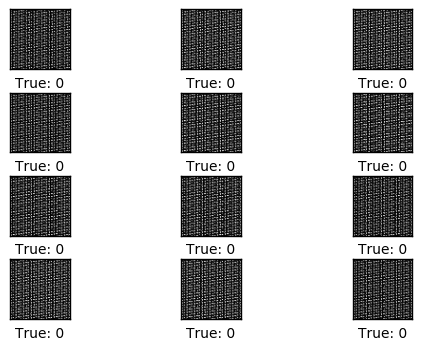

In [38]:
images = data[10:22]
data_label2 = data_label
cls_true = data_label2[10:22]

plot_images(images=images, cls_true=cls_true)

In [40]:
# Please close the file to free space of GPU. Restart kernel to get the space
session.close()